<a href="https://colab.research.google.com/github/smjimenez97/maquina_soporte/blob/master/Maquina_Soporte_De_Vectores.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

1. Obtención de los datos

In [1]:
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd

In [3]:
df_test = pd.read_csv('mnist_test_short.csv', header=None, dtype='uint8')

In [4]:
df_train = pd.read_csv('mnist_train_short.csv', header=None, dtype='uint8')

2. Entendiendo la base de datos MNIST

In [ ]:
#Mostrar las primeras filas del archivo de entrenamiento
#No tienen encabezado las columnas
#Columna 0: es el target o el digito escrito a mano
#Columna 1 a la 784: Pixeles en escala de 0 a 255
#Cada pixel tiene un valor de brillo comprendido entre 0(negro) y 255 (blanco).

In [5]:
df_train.head()

,0,1,2,3,4,5,6,7,8,9,...,775,776,777,778,779,780,781,782,783,784
0,5,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
2,4,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
3,1,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
4,9,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


In [7]:
#Definir una variable que guarde los identificadores, es decir; la primera columna
y_digits_train= df_train.iloc[:,0]
y_digits_train

0        5
1        0
2        4
3        1
4        9
        ..
11995    1
11996    6
11997    2
11998    8
11999    3
Name: 0, Length: 12000, dtype: uint8

In [8]:
#Crear una máscara para encontrar el indice de las filas con el número 5
y_digits_train[y_digits_train==5]

0        5
11       5
35       5
47       5
65       5
        ..
11936    5
11963    5
11966    5
11980    5
11983    5
Name: 0, Length: 1048, dtype: uint8

In [9]:
#Guardar alguna fila en una variable llamada num5
num5 = df_train.iloc[35].values[1:].reshape((28,28))

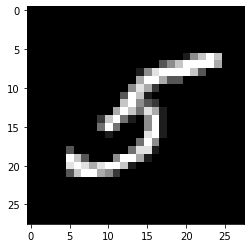

In [10]:
#Graficar la imagen del numero 5
plt.imshow(num5, cmap='gray')
plt.show()

<function matplotlib.pyplot.show(*args, **kw)>

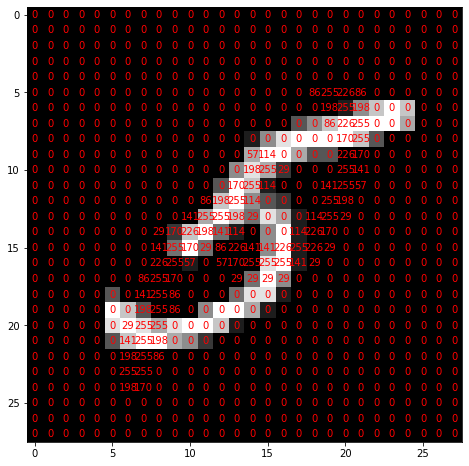

In [11]:
#mostrar los elementos que componen el arreglo sobre la imagen del número 5
plt.figure(figsize=(8,8))
plt.imshow(num5, cmap='gray')
for (i,j), label in np.ndenumerate(num5):
  plt.text(i,j,label,ha='center',va='center',color='red')
plt.show

3. Prepare los datos

In [12]:
#Definir los conjuntos de datos de las muestras de entrenamiento y prueba
x_train = df_train.iloc[:,1:]
y_train= df_train.iloc[:,0]

x_test = df_test.iloc[:,1:]
y_test = df_test.iloc[:,0]

4. Definimos el pipeline y el clasificador

In [13]:
from sklearn.preprocessing import StandardScaler
from sklearn.svm import SVC
from sklearn.pipeline import Pipeline

steps = [
    ('scaler', StandardScaler()),
    ('SVM', SVC(kernel='poly'))
]

pipeline = Pipeline(steps)

5. Realizamos el tuning

In [20]:
#Parámetros
#c = [0.0001,0.001]
#gamma = [20,10]
parametros = {'SVM__C':[0.0001,0.001],'SVM__gamma':[20,10]}

In [21]:
#Realizar el tuning
from sklearn.model_selection import GridSearchCV
grid = GridSearchCV(pipeline, param_grid=parametros, cv=5, n_jobs=-1, verbose=5)

In [24]:
#ajuste
grid.fit(x_train, y_train)

Fitting 5 folds for each of 4 candidates, totalling 20 fits


GridSearchCV(cv=5,
             estimator=Pipeline(steps=[('scaler', StandardScaler()),
                                       ('SVM', SVC(kernel='poly'))]),
             n_jobs=-1,
             param_grid={'SVM__C': [0.0001, 0.001], 'SVM__gamma': [20, 10]},
             verbose=5)

6. Probamos el clasificador SVM

In [25]:
#Encontrar el score
grid.score(x_test, y_test)

0.952

In [26]:
#Realizar la prediccion en los datos de test
y_pred = grid.predict(x_test)

In [27]:
#mostrar la prediccion para los primeros 10 valores de prueba
y_pred[0:10]

array([7, 2, 1, 0, 4, 1, 4, 4, 5, 9], dtype=uint8)

In [28]:
#mostrar los valores reales de los primeros 10 valores de prueba
y_test[0:10]

0    7
1    2
2    1
3    0
4    4
5    1
6    4
7    9
8    5
9    9
Name: 0, dtype: uint8

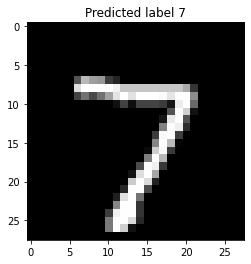

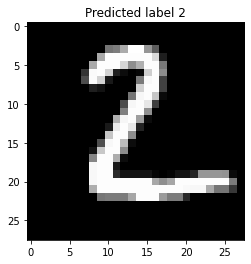

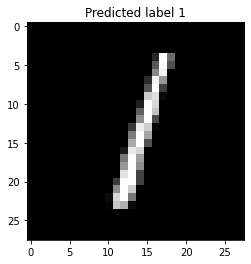

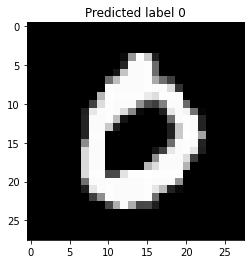

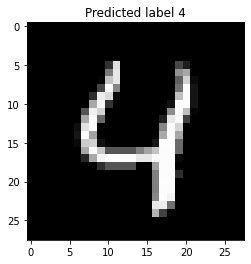

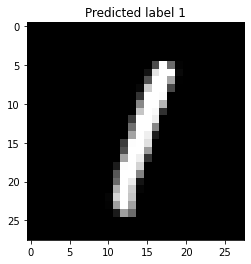

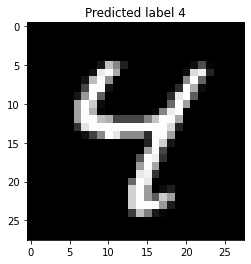

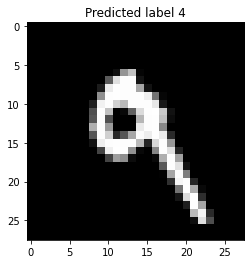

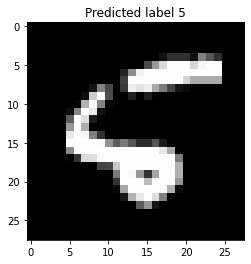

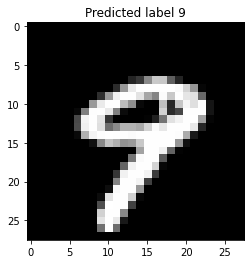

In [30]:
for i in range(10):
  img = x_test.values[i].reshape((28,28))
  plt.title('Predicted label {0}'.format(y_pred[i]))
  plt.imshow(img, cmap='gray')
  plt.show()